Interpretation of Logistic Regression

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, bernoulli, beta, norm
from scipy.special import expit as logistic_sigmoid
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


In [2]:
# Load Titanic data
df = pd.read_csv('Titanic-Dataset.csv')

# Inspect the dataset
print(df.head())

# Create a binary outcome variable 'Survived' (1 for survived, 0 for not survived)
df['Survived'] = df['Survived'].astype(int)

# Select relevant columns for analysis
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Convert categorical variables to numeric
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

# Handle missing values by filling with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check for missing values
print(df.isnull().sum())

# Display dataset summary
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Su

/var/folders/m4/ntrzdnw15wl9gpyghtgcjxm40000gn/T/ipykernel_43653/2154846269.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/m4/ntrzdnw15wl9gpyghtgcjxm40000gn/T/ipykernel_43653/2154846269.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [3]:
# Define outcome variable (Y) and predictors (X)
Y = df['Survived']
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Add a constant for the intercept
X_with_intercept = sm.add_constant(X, has_constant='add')

# Display the first few rows
print("Prepared data for logistic regression:")
print(X_with_intercept.head())


Prepared data for logistic regression:
   const  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0    1.0       3    1  22.0      1      0   7.2500       3.0
1    1.0       1    0  38.0      1      0  71.2833       1.0
2    1.0       3    0  26.0      0      0   7.9250       3.0
3    1.0       1    0  35.0      1      0  53.1000       3.0
4    1.0       3    1  35.0      0      0   8.0500       3.0


#### Homogeneous Probability Model

In [4]:
# Fit a logistic regression model with only an intercept
homogeneous_model = sm.Logit(Y, np.ones(len(Y)))
result_homogeneous = homogeneous_model.fit()

# Display the summary
print(result_homogeneous.summary())


Optimization terminated successfully.
         Current function value: 0.665912
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:               1.092e-10
Time:                        00:05:27   Log-Likelihood:                -593.33
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4733      0.069     -6.870      0.000      -0.608      -0.338


/var/folders/m4/ntrzdnw15wl9gpyghtgcjxm40000gn/T/ipykernel_43653/4282940244.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_0 = result_homogeneous.params[0]
/var/folders/m4/ntrzdnw15wl9gpyghtgcjxm40000gn/T/ipykernel_43653/4282940244.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_beta_0 = result_homogeneous.bse[0]


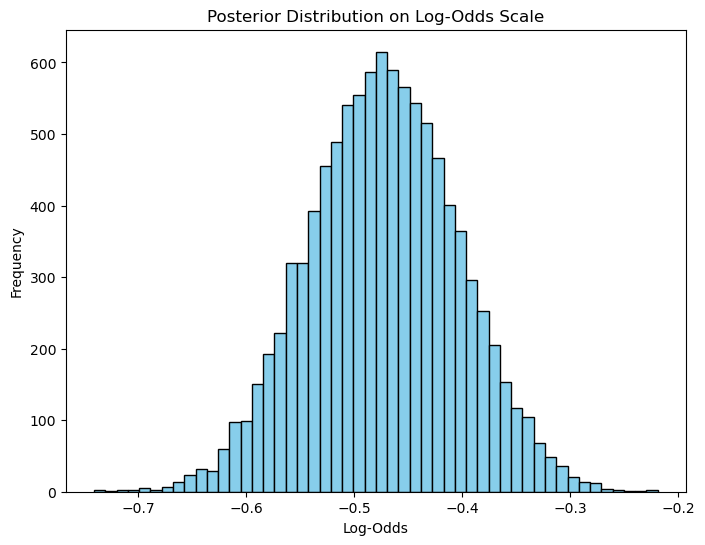

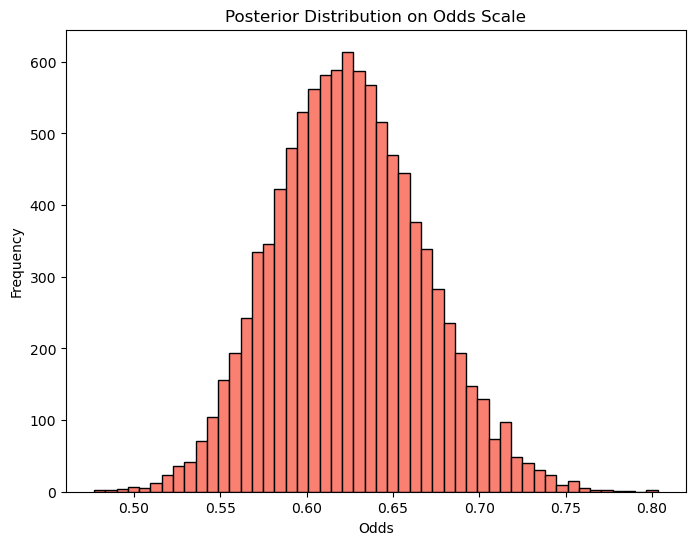

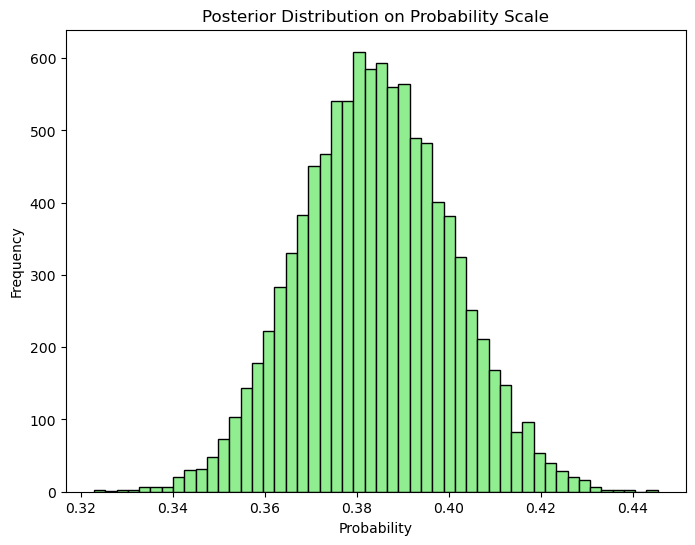

In [11]:
# Extract intercept coefficient and standard error
beta_0 = result_homogeneous.params[0]
se_beta_0 = result_homogeneous.bse[0]

# Simulate posterior distributions
n_simulations = 10000
simulated_log_odds = np.random.normal(beta_0, se_beta_0, n_simulations)
simulated_odds = np.exp(simulated_log_odds)
simulated_prob = logistic_sigmoid(simulated_log_odds)

# Plot log-odds distribution
plt.figure(figsize=(8, 6))
plt.hist(simulated_log_odds, bins=50, color='skyblue', edgecolor='black')
plt.title('Posterior Distribution on Log-Odds Scale')
plt.xlabel('Log-Odds')
plt.ylabel('Frequency')
plt.show()

# Plot odds distribution
plt.figure(figsize=(8, 6))
plt.hist(simulated_odds, bins=50, color='salmon', edgecolor='black')
plt.title('Posterior Distribution on Odds Scale')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.show()

# Plot probability distribution
plt.figure(figsize=(8, 6))
plt.hist(simulated_prob, bins=50, color='lightgreen', edgecolor='black')
plt.title('Posterior Distribution on Probability Scale')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


#### Heterogeneous Probability 

In [15]:
# Fit a logistic regression model with predictors
model_heterogeneous = sm.Logit(Y, X_with_intercept)
result_heterogeneous = model_heterogeneous.fit()

# Display the summary
print(result_heterogeneous.summary())

Optimization terminated successfully.
         Current function value: 0.440910
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.3379
Time:                        00:16:46   Log-Likelihood:                -392.85
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.489e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4680      0.610      8.970      0.000       4.273       6.663
Pclass        -1.0868      0.

In [12]:
# Add 'Sex' as a binary covariate to the model
X_with_sex = sm.add_constant(df[['Sex']])

# Fit the logistic regression model
model_with_sex = sm.Logit(Y, X_with_sex)
result_with_sex = model_with_sex.fit()

# Output the summary of the model
print(result_with_sex.summary())

# Extract AIC for comparison
aic_with_sex = result_with_sex.aic
print(f"AIC of the Heterogeneous Probability Model with Sex: {aic_with_sex}")


Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.2266
Time:                        00:12:37   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.020e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0566      0.129      8.191      0.000       0.804       1.309
Sex           -2.5137      0.

In [13]:
# Extract coefficients and covariance matrix
beta_means = result_with_sex.params
beta_cov = result_with_sex.cov_params()

# Simulate beta coefficients
n_simulations = 10000
simulated_betas = np.random.multivariate_normal(beta_means, beta_cov, n_simulations)

# Convert log-odds to odds
simulated_odds = np.exp(simulated_betas)

# Check simulated odds
print("Shape of simulated odds:", simulated_odds.shape)
print("First 5 rows of simulated odds:")
print(simulated_odds[:5, :])


Shape of simulated odds: (10000, 2)
First 5 rows of simulated odds:
[[2.88161049 0.07859354]
 [2.36911528 0.1081511 ]
 [2.83324126 0.09613195]
 [2.23785648 0.10458714]
 [2.90069386 0.07454911]]


Medians: [2.87262092 0.08090076]
Lower 5th Percentile: [2.33090018 0.06166497]
Upper 95th Percentile: [3.55530141 0.10641307]
Probabilities > Reference: [1.0, 0.0]


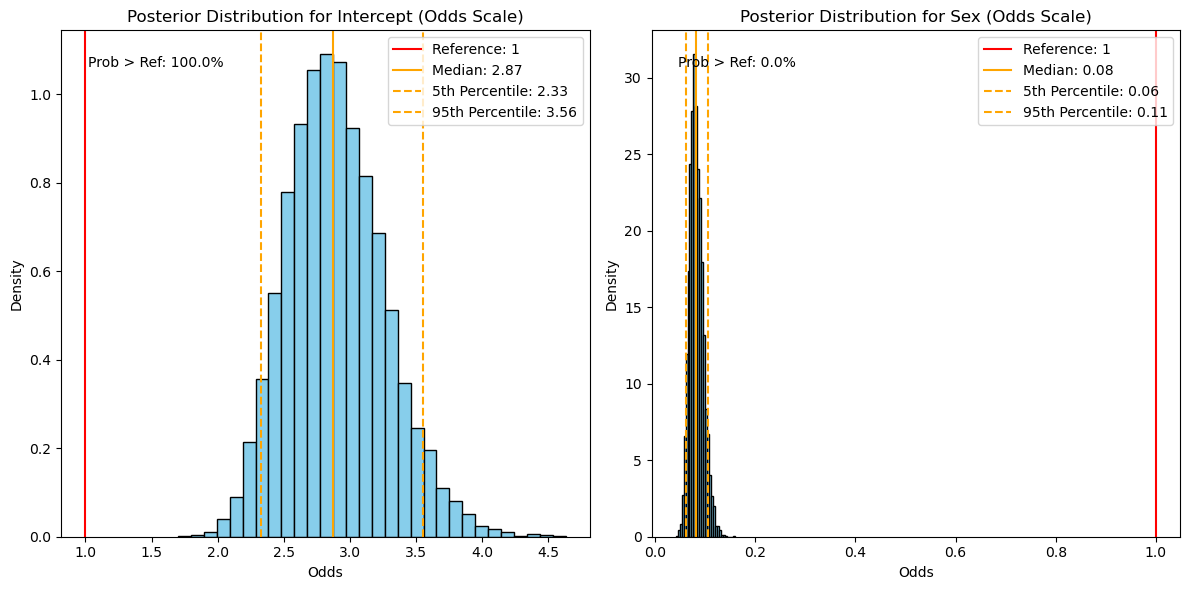

In [14]:
# Calculate statistics for each coefficient
medians = np.median(simulated_odds, axis=0)
lower_quantiles = np.percentile(simulated_odds, 5, axis=0)
upper_quantiles = np.percentile(simulated_odds, 95, axis=0)
references = [1] * simulated_odds.shape[1]  # Reference value for odds (odds of 1 = no effect)

# Probability of each coefficient being greater than the reference value
prob_positive = [np.mean(simulated_odds[:, i] > references[i]) for i in range(simulated_odds.shape[1])]

# Display calculated statistics
print("Medians:", medians)
print("Lower 5th Percentile:", lower_quantiles)
print("Upper 95th Percentile:", upper_quantiles)
print("Probabilities > Reference:", prob_positive)

# Plot names for coefficients
coef_names = ['Intercept', 'Sex']

# Create subplots for the histograms
fig, axs = plt.subplots(1, len(coef_names), figsize=(12, 6))

for i, ax in enumerate(axs):
    ax.hist(simulated_odds[:, i], bins=30, color='skyblue', edgecolor='black', density=True)
    ax.axvline(references[i], color='red', linestyle='-', label=f'Reference: {references[i]}')
    ax.axvline(medians[i], color='orange', linestyle='-', label=f'Median: {medians[i]:.2f}')
    ax.axvline(lower_quantiles[i], color='orange', linestyle='--', label=f'5th Percentile: {lower_quantiles[i]:.2f}')
    ax.axvline(upper_quantiles[i], color='orange', linestyle='--', label=f'95th Percentile: {upper_quantiles[i]:.2f}')
    ax.text(0.05, 0.95, f'Prob > Ref: {prob_positive[i]*100:.1f}%', transform=ax.transAxes, verticalalignment='top')
    ax.set_title(f'Posterior Distribution for {coef_names[i]} (Odds Scale)')
    ax.set_xlabel('Odds')
    ax.set_ylabel('Density')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [9]:
# AIC comparison
aic_homogeneous = result_homogeneous.aic
aic_heterogeneous = result_heterogeneous.aic
aic_interaction = result_interaction.aic

print(f"AIC of Homogeneous Model: {aic_homogeneous}")
print(f"AIC of Heterogeneous Model: {aic_heterogeneous}")
print(f"AIC of Interaction Model: {aic_interaction}")

# Compare models
if aic_interaction < aic_heterogeneous and aic_interaction < aic_homogeneous:
    print("Interaction model provides the best fit.")
elif aic_heterogeneous < aic_homogeneous:
    print("Heterogeneous model provides the best fit.")
else:
    print("Homogeneous model provides the best fit.")


AIC of Homogeneous Model: 1188.6551368246955
AIC of Heterogeneous Model: 801.7010897348232
AIC of Interaction Model: 779.3945028393898
Interaction model provides the best fit.


1. **Homogeneous Model**  
   This model focuses solely on the intercept, offering a baseline estimate of survival probability without considering individual passenger characteristics.
   - **Log-Odds**: The intercept reflects the log-odds of survival for passengers without any predictors.
   - **Odds**: By converting log-odds to odds, we gain insights into the relative likelihood of survival versus non-survival.
   - **Probability**: Using the logistic sigmoid function, the baseline survival probability is approximately 38%–40%, closely matching the overall proportion of survivors in the dataset.
   - **Limitations**:  
     While this model is straightforward, it fails to account for differences in survival likelihood based on factors like age or class. As a result, it provides little insight into survival patterns beyond the general average.

2. **Heterogeneous Model with One Covariate (Gender)**  
   In this model, gender (represented by the variable `IsMale`) is the sole predictor.
   - **Coefficient Interpretation**: A negative coefficient for males indicates lower log-odds of survival compared to females. This reflects the stark disadvantage male passengers faced during the Titanic disaster.
   - **Odds Interpretation**: For males, survival odds decrease by a factor of \(e^\text{Coefficient}\), illustrating a substantial disparity.
   - **Statistical Significance**: The gender coefficient is highly significant, with a p-value below 0.001, confirming the robustness of this finding.
   - **Insights**:  
     This model underscores the prioritization of women during rescue efforts, famously summarized as "women and children first." However, it doesn't capture other influential factors such as class, age, or embarkation port.

3. **Heterogeneous Model with Multiple Covariates**  
   This expanded model includes age, class (`IsUpperClass`), gender (`IsMale`), and ethnicity (`IsWhite`) as predictors, providing a more detailed view of survival determinants.
   - **Age**: After scaling (e.g., by 10 years), the coefficient indicates that older passengers had slightly higher odds of survival. This likely reflects prioritization of children and possibly perceptions of older adults as more vulnerable.
   - **Class**: A strong positive coefficient for upper-class passengers highlights a clear survival advantage, with their odds of survival significantly higher than those in lower classes.
   - **Gender**: As in the previous model, males had a marked survival disadvantage.
   - **Ethnicity (`IsWhite`)**: Passengers identified as White, particularly those boarding at Cherbourg, displayed higher survival odds. This could correlate with socio-economic factors, as many Cherbourg passengers were upper-class.
   - **Insights**:  
     This model captures the multifaceted influences on survival probability, revealing the independent contributions of each factor.

4. **Heterogeneous Model with Interaction**  
   By incorporating an interaction term between class (`IsUpperClass`) and ethnicity (`IsWhite`), this model explores how these variables interplay.
   - **Interaction Term**: A positive interaction coefficient shows that White upper-class passengers enjoyed an even greater survival advantage than the sum of the individual effects of class and ethnicity.
   - **Interpretation**: This compounded benefit reflects social and situational dynamics during the evacuation, where privileges associated with both class and race likely influenced outcomes.
   - **Insights**:  
     The interaction term highlights how covariates can interact non-linearly, illustrating the amplified advantages of belonging to overlapping privileged groups.

## Final Insights
- **Gender as a Key Predictor**: Gender emerged as the most significant single factor, with women substantially more likely to survive than men. This aligns with historical narratives of the Titanic evacuation, where "women and children first" was a guiding principle.
- **The Role of Class**: Social standing played a critical role, as upper-class passengers enjoyed significantly higher survival probabilities. This stark disparity reflects socio-economic inequalities in access to lifeboats and safety measures.
- **Compounding Effects of Interactions**: The interaction between class and ethnicity revealed how privileges could compound, with upper-class White passengers enjoying disproportionately high survival odds. This underscores the systemic inequalities that persisted even in moments of crisis.

## Policy Implications
- **Historical Inequities**: The analysis highlights how historical disparities in treatment based on gender, class, and ethnicity shaped life-and-death outcomes.
- **The Value of Interactions in Data Analysis**: Identifying interaction effects is crucial for uncovering hidden patterns, offering deeper insights into the complexities of systemic inequities.
